In [10]:
%autosave 0

Autosave disabled


In [11]:
import os
startup_file = "/Users/octavia/Dropbox/fire/src_v1/startup.py"

In [12]:
run "/Users/octavia/Dropbox/fire/src_v1/startup.py"

In [13]:

from multiprocessing import Pool

updates = [{"dt_p" : np.round(s, 5)} for  s in  [0.1, 1]]
        
def f(update):
    
    p = RCSR()
    
    param = default_params()
    param.update({
              "ti" : 10000, 
              "tmax" : 10000,
              "RI" : 20,
              "severity" : 0.7,
              "severity_type" : "random",
              "ignition_type" : "random",
         })
    param.update(update)

    p = RCSR(param)
    p.run()
    return p

pool = Pool(processes=8)             


result =  (pool.map(f, updates)  )       
pool.close()

p = result[0]


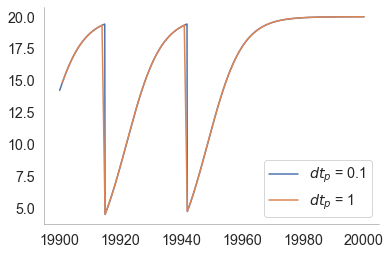

In [14]:
for i, p in enumerate(result):
    to = - int(5*p.RI/p.dt_p)
    plt.plot(p.t_p[to:], p.G_u_list[to:], '-', label = print_dict(updates[i]))
plt.legend()

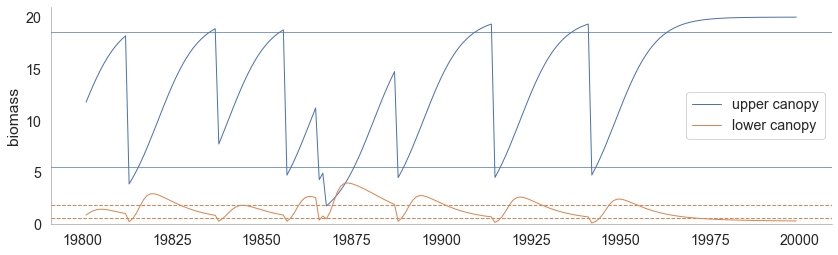

In [15]:
canopy_plot(p, nfire = 10)